# Single Variate Analysis on Payment Mode
There are different methods to make payment for the things purchased through Olist. Now, there is the convenience of paying using credit or debit cards online.

This notebook is created to find out if there is a relationship with the payment mode and review score; If paying by a certain method will affect the review score.


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
olist_orders_dataset = pd.read_csv("olist_orders_dataset.csv")
olist_order_reviews_dataset = pd.read_csv("olist_order_reviews_dataset.csv")
olist_order_payments_dataset = pd.read_csv("olist_order_payments_dataset.csv")

In [3]:
olist_merge = olist_orders_dataset.merge(olist_order_reviews_dataset, on="order_id", how = 'left')
olist_merge = olist_merge.merge(olist_order_payments_dataset, on="order_id", how = 'left')

In [4]:
olist_merge.describe()

,review_score,payment_sequential,payment_installments,payment_value
count,104486.000000,104485.000000,104485.000000,104485.000000
mean,4.068392,1.093372,2.856630,153.925122
std,1.361209,0.709263,2.690259,217.116119
min,1.000000,1.000000,0.000000,0.000000
25%,4.000000,1.000000,1.000000,56.780000
50%,5.000000,1.000000,1.000000,100.000000
75%,5.000000,1.000000,4.000000,171.690000
max,5.000000,29.000000,24.000000,13664.080000


In [5]:
olist_merge.corr()

,review_score,payment_sequential,payment_installments,payment_value
review_score,1.000000,-0.012863,-0.029037,-0.047644
payment_sequential,-0.012863,1.000000,-0.086792,-0.070018
payment_installments,-0.029037,-0.086792,1.000000,0.330170
payment_value,-0.047644,-0.070018,0.330170,1.000000


There is a weak positive correlation between the payment value and payment installments. However, as for the other variables there is no relationship.

In [6]:
olist_merge["payment_type"] = olist_merge['payment_type'].astype('category')

<AxesSubplot:xlabel='review_score', ylabel='payment_type'>

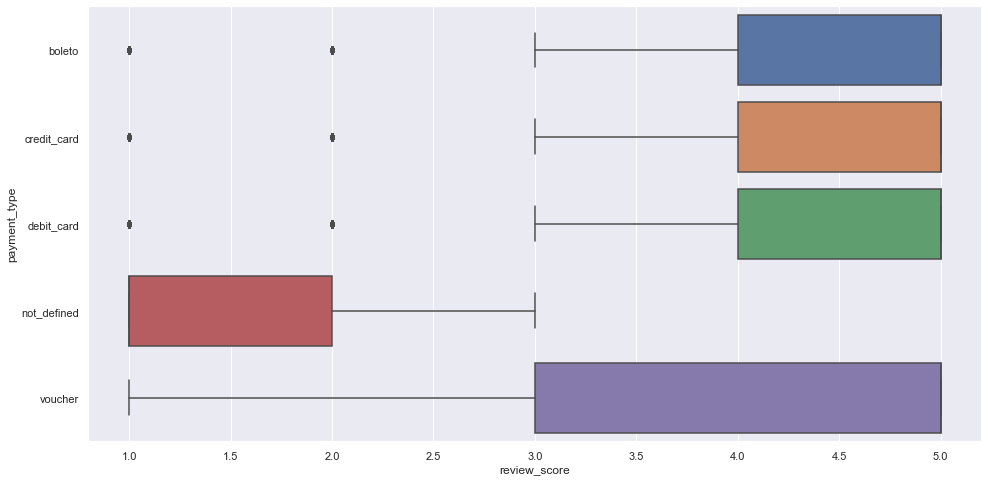

In [7]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_type', data = olist_merge)

This shows that payment type of not_defined  has the lowest review score. However, this is because this category was not delivered at all. For the other payment types, in general, the review score is withing the range of 3-5, and have similar distributions for some. The similar distribution may be attributed because of the similarity of the way payment is being made despite the different mode of payment.

<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

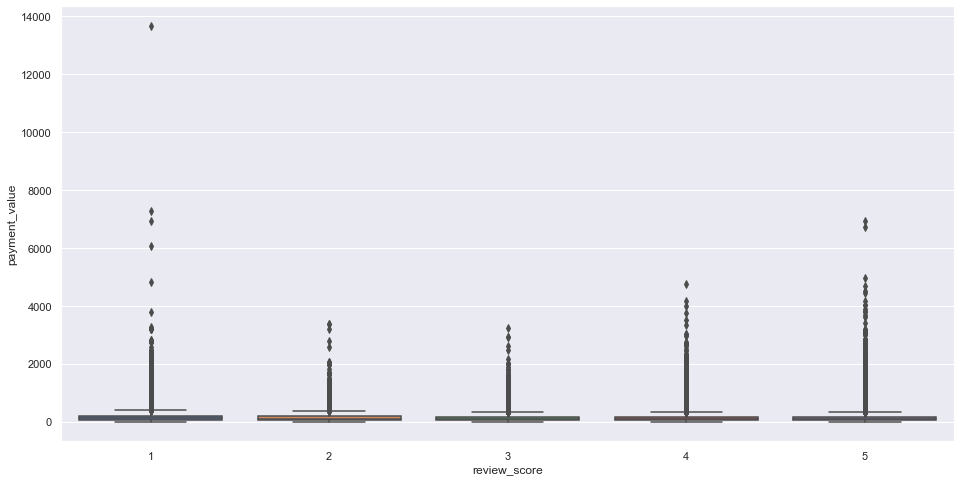

In [8]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_value', data = olist_merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_value'>

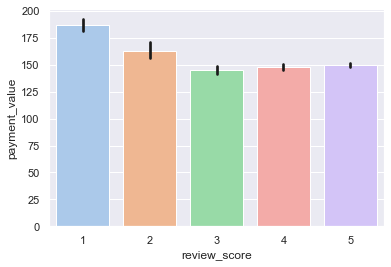

In [9]:
sb.barplot(x='review_score', y='payment_value', data=olist_merge, palette ="pastel" , errcolor='k')

There is a visible segregation between the payment_value.This could potentially be used to predict review score and future purchases. While it may not help in predicting scores between 3, 4 and 5. It can be used to distinguish between review scores 1, 2 and 3,4,5. Hence, up sampling could be used to help predict review scores.

<AxesSubplot:xlabel='review_score', ylabel='payment_installments'>

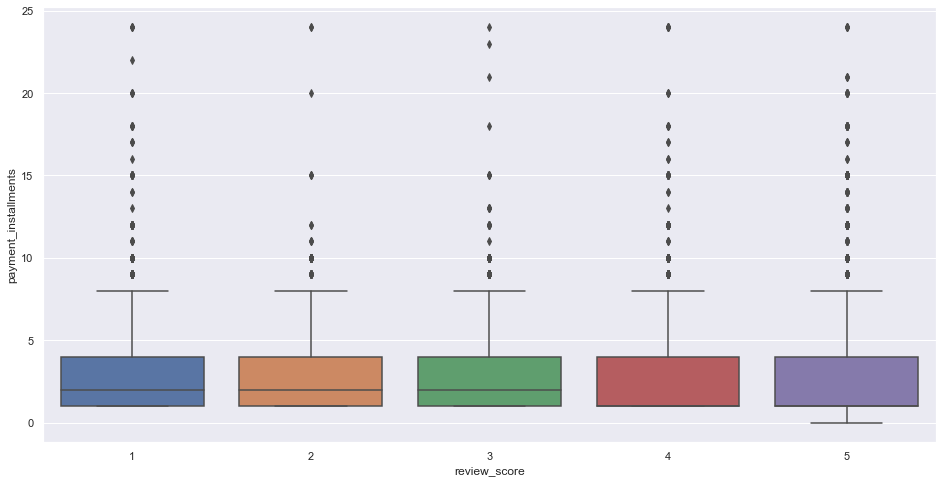

In [10]:
f = plt.figure(figsize=(16, 8))
sb.boxplot(x = 'review_score', y = 'payment_installments', data = olist_merge)

<AxesSubplot:xlabel='review_score', ylabel='payment_installments'>

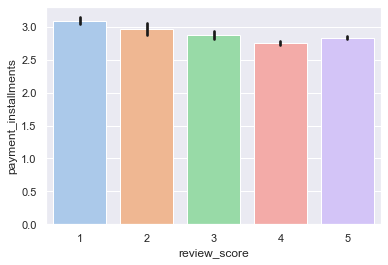

In [11]:
sb.barplot(x='review_score', y='payment_installments', data=olist_merge, palette ="pastel" , errcolor='k')

For payment_installments, it is more difficult to distinguish the values as they are much lesser than that of the payment_value. From the bar plot above it can be seen that the differences is values for payment_installments are very minimal. Using payment_installments data to predict review_score does not seem like a good idea even if the data were to be upsampled.

# Check Point: Analysis 
Firstly, there is only weak or no correlation between the variables in the payment dataset.

Similarly, the payment_installements against the review_score has no substantial difference to help show a relationship.

However, for the payment value there a relationship could be formed by grouping the review scores and this could potentially help to predict the classification of the review scores.
